In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# row, columns 길게 조회할 수 있게 옵션 걸어두기
pd.options.display.max_info_columns =200
pd.options.display.max_columns = 200
pd.options.display.max_info_rows =999
pd.options.display.max_rows = 999

import warnings
warnings.filterwarnings(action='ignore')

In [14]:
# 한글글꼴
import warnings
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttfn"
if platform.system() == 'Darwin':
    font_name = 'AppleGothic'
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

warnings.simplefilter(action='ignore')


# 1. 데이터 EDA

## 변수명

- jur_stn : 관할 경찰서명
- year : 2017년 ~ 2020년 상/하반기

5. 112신고
- report_sx_남성, report_sx_불상,report_sx_여성, report_sx_total : 112 신고 건수(성별/전체)
- vio_cnt : 폭력 신고건수
- mur_rob_cnt : 살인,강도 신고건수
- car_cnt : 교통사고 신고 건수

6. 범죄발생
- 5m_crm_yn = 총 범죄 발생건 수
- theft_violence_x = 범죄 발생건 수(절도, 폭력 만 해당)
- robber_murder_x = 범죄 발생건 수(강도, 살인 만 해당)
- traffic_x = 범죄 발생건 수(교통 만 해당)
- public_x = 범죄 발생건 수(집회, 광고물, 국민기초만 해당)

7. 범죄검거
- crm = 총 범죄 검거건 수
- theft_violence_y = 범죄 검거건 수(절도, 폭력 만 해당)
- robber_murder_y = 범죄 검거건 수(강도, 살인 만 해당)
- traffic_y = 범죄 검거건 수(교통 만 해당)
- public_y = 범죄 검거건 수(집회, 광고물, 국민기초만 해당)

9. 보안등
- light_cnt : 새로 설치된 보안등 수

10. cctv
- cctv : 새로 설치된 cctv 수

11. 교통사고
- 차대사람, 차대차, 차량단독 : 해당 컬럼명별 교통사고 건수
- 가해_성별_기타불명, 가해_남, 가해_여 : 교통사고 가해 건수(성별)
- 피해_10대이하, 피해_20대, 피해_30대, 피해_40대, 피해_50대, 피해_60대, 피해_70대, 피해_80대이상 : 교통사고 건수(연령별)
- 피해_미분류, 피해_남, 피해_여 : 교통사고 피해 건수(성별)

12. 경찰직원 현황
- pol_num : 연도별 경찰서별 직원 수

14. 연령별 인구
- popu_합계: 전체 인구
- for_합계: 외국인 인구
- popu_u20: 20세 미만 인구
- popu_2030: 2030대 인구
- popu_4050: 4050대 인구
- popu_o60: 60세 이상 인구
- for_u20: 20세 미만 외국인 인구
- for_2030: 2030대 외국인 인구
- for_4050: 4050대 외국인 인구
- for_o60: 60세 이상 외국인 인구

15. 1인 가구
- single_합계: 전체 1인가구수
- single_u20: 20세 미만 1인가구수
- single_2030: 2030대 1인가구수
- single_4050: 4050대 1인가구수
- single_o60: 60세 이상 1인가구수
- single_f_합계: 전체 여성 1인가구수
- single_f_u20: 20세 미만 여성 1인가구수
- single_f_2030: 2030대 여성 1인가구수
- single_f_4050: 4050대 여성 1인가구수
- single_f_o60: 60세 이상 여성 1인가구수


21. 유흥업소
- adult : 새로 생긴 유흥업소 수

22. 비상벨
- bell : 새로 설치된 비상벨 수

4. 체감안전도 통계 (y)
- q1: 절도폭력 안전도 설문결과
- q2: 강도살인 안전도 설문결과
- q3: 교통사고 안전도 설문결과
- q4: 법질서 준수도 설문결과
- q5: 전반적 안전도 설문결과

In [16]:
# 데이터 불러오기
df = pd.read_csv('/Users/ppangppang/Desktop/ssac/Main_project/processed_data(slack)/total_data(2016제외).csv')
df.tail()

,jur_stn,year,report_sx_남성,report_sx_불상,report_sx_여성,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,5m_crm_yn,theft_violence_x,robber_murder_x,traffic_x,public_x,crm,theft_violence_y,robber_murder_y,traffic_y,public_y,light_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,가해_10대이하,가해_20대,가해_30대,가해_40대,가해_50대,가해_60대,가해_70대,가해_80대이상,가해_미분류,피해_남,피해_미분류,피해_여,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상,cctv,pol_num,popu_합계,for_합계,popu_u20,popu_2030,popu_4050,popu_o60,for_u20,for_2030,for_4050,for_o60,single_합계,single_u20,single_2030,single_4050,single_o60,single_f_합계,single_f_u20,single_f_2030,single_f_4050,single_f_o60,adult,bell,q1,q2,q3,q4,q5
323,창원서부경찰서,2020(하반기),11915.0,2751.0,6897.0,21563.0,1282.0,1.0,1984.0,2686.0,396.0,3.0,776.0,0.0,2599.0,272.0,4.0,755.0,0.0,0.0,67.0,236.0,8.0,4.0,236.0,71.0,3.0,29.0,52.0,49.0,82.0,72.0,18.0,2.0,4.0,217.0,8.0,86.0,7.0,30.0,61.0,62.0,67.0,49.0,16.0,11.0,0.0,318.0,262241.0,3605.000000,45880.727610,73817.480014,92324.861419,50217.930957,142.079412,2112.812745,1171.978431,178.129412,27185.666667,112.666667,8241.666667,10835.000000,7996.333333,12571.0,55.000000,2844.333333,4446.333333,5225.333333,0.0,0.0,NaN,NaN,NaN,NaN,NaN
324,마산중부경찰서,2020(하반기),9913.0,2094.0,5405.0,17412.0,1107.0,1.0,1301.0,1933.0,228.0,6.0,527.0,1.0,1924.0,168.0,6.0,509.0,0.0,0.0,64.0,185.0,26.0,1.0,207.0,67.0,2.0,31.0,24.0,52.0,71.0,61.0,26.0,7.0,1.0,190.0,27.0,58.0,9.0,34.0,34.0,42.0,52.0,52.0,17.0,8.0,0.0,283.0,175504.0,2158.000000,27766.711604,42810.843444,54531.271738,50395.173213,117.334817,1325.677583,614.806995,100.180604,22268.333333,356.333333,5382.000000,6735.666667,9794.333333,11834.0,140.000000,1960.333333,2944.666667,6789.000000,5.0,5.0,NaN,NaN,NaN,NaN,NaN
325,마산동부경찰서,2020(하반기),13687.0,3432.0,6906.0,24025.0,1430.0,4.0,1919.0,2502.0,418.0,4.0,473.0,3.0,2447.0,244.0,3.0,483.0,2.0,0.0,54.0,118.0,4.0,0.0,134.0,42.0,2.0,15.0,19.0,32.0,58.0,38.0,11.0,1.0,0.0,103.0,4.0,69.0,7.0,18.0,30.0,31.0,39.0,27.0,18.0,2.0,0.0,369.0,193101.0,2000.000000,32967.827110,46268.944597,66211.590197,47652.638096,86.381052,1196.795542,585.161964,131.661442,20188.333333,70.000000,3935.333333,7462.000000,8721.000000,10440.0,35.333333,1498.000000,3108.666667,5798.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN
326,진주경찰서,2020(하반기),18826.0,4426.0,11375.0,34627.0,2347.0,2.0,3169.0,3948.0,767.0,3.0,892.0,0.0,3851.0,527.0,4.0,913.0,1.0,0.0,115.0,199.0,13.0,6.0,235.0,86.0,8.0,51.0,58.0,46.0,80.0,54.0,19.0,5.0,6.0,182.0,13.0,132.0,25.0,37.0,41.0,39.0,69.0,60.0,33.0,10.0,98.0,526.0,353236.0,6427.333333,66534.827058,94531.118402,112650.413908,79519.640632,381.038777,4410.703579,1404.631152,230.959825,42588.666667,737.666667,14475.666667,11931.666667,15443.666667,22673.0,368.666667,5721.333333,5282.000000,11301.000000,2.0,2.0,NaN,NaN,NaN,NaN,NaN
327,진해경찰서,2020(하반기),9652.0,2111.0,5009.0,16772.0,1116.0,1.0,1537.0,1855.0,217.0,1.0,497.0,1.0,1873.0,143.0,1.0,509.0,1.0,0.0,65.0,329.0,18.0,3.0,295.0,114.0,14.0,57.0,50.0,96.0,90.0,66.0,25.0,11.0,3.0,258.0,18.0,136.0,17.0,41.0,75.0,95.0,82.0,58.0,20.0,6.0,0.0,276.0,192759.0,3363.000000,40904.674610,49944.560238,63236.787060,38672.978092,144.998170,1938.324588,1073.807200,205.870043,19982.666667,48.000000,6106.333333,7120.000000,6708.333333,8845.0,25.000000,1663.666667,2576.000000,4580.333333,3.0,3.0,NaN,NaN,NaN,NaN,NaN


In [17]:
len(df.columns)

75

# 이상치 확인

In [6]:
df.columns

Index(['jur_stn', 'year', 'report_sx_남성', 'report_sx_불상', 'report_sx_여성',
       'report_sx_total', 'vio_cnt', 'mur_rob_cnt', 'car_cnt', '5m_crm_yn',
       'theft_violence_x', 'robber_murder_x', 'traffic_x', 'public_x', 'crm',
       'theft_violence_y', 'robber_murder_y', 'traffic_y', 'public_y',
       'light_cnt', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남', '가해_여',
       '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대', '가해_70대',
       '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하', '피해_20대',
       '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상', 'cctv',
       'pol_num', 'popu_합계', 'for_합계', 'popu_u20', 'popu_2030', 'popu_4050',
       'popu_o60', 'for_u20', 'for_2030', 'for_4050', 'for_o60', 'single_합계',
       'single_u20', 'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_u20', 'single_f_2030', 'single_f_4050', 'single_f_o60',
       'adult', 'bell', 'q1', 'q2', 'q3', 'q4', 'q5'],
      dtype='object')

In [7]:
col_name = df.columns[2:]
col_name

Index(['report_sx_남성', 'report_sx_불상', 'report_sx_여성', 'report_sx_total',
       'vio_cnt', 'mur_rob_cnt', 'car_cnt', '5m_crm_yn', 'theft_violence_x',
       'robber_murder_x', 'traffic_x', 'public_x', 'crm', 'theft_violence_y',
       'robber_murder_y', 'traffic_y', 'public_y', 'light_cnt', '차대사람', '차대차',
       '차량단독', '가해_성별_기타불명', '가해_남', '가해_여', '가해_10대이하', '가해_20대', '가해_30대',
       '가해_40대', '가해_50대', '가해_60대', '가해_70대', '가해_80대이상', '가해_미분류', '피해_남',
       '피해_미분류', '피해_여', '피해_10대이하', '피해_20대', '피해_30대', '피해_40대', '피해_50대',
       '피해_60대', '피해_70대', '피해_80대이상', 'cctv', 'pol_num', 'popu_합계', 'for_합계',
       'popu_u20', 'popu_2030', 'popu_4050', 'popu_o60', 'for_u20', 'for_2030',
       'for_4050', 'for_o60', 'single_합계', 'single_u20', 'single_2030',
       'single_4050', 'single_o60', 'single_f_합계', 'single_f_u20',
       'single_f_2030', 'single_f_4050', 'single_f_o60', 'adult', 'bell', 'q1',
       'q2', 'q3', 'q4', 'q5'],
      dtype='object')

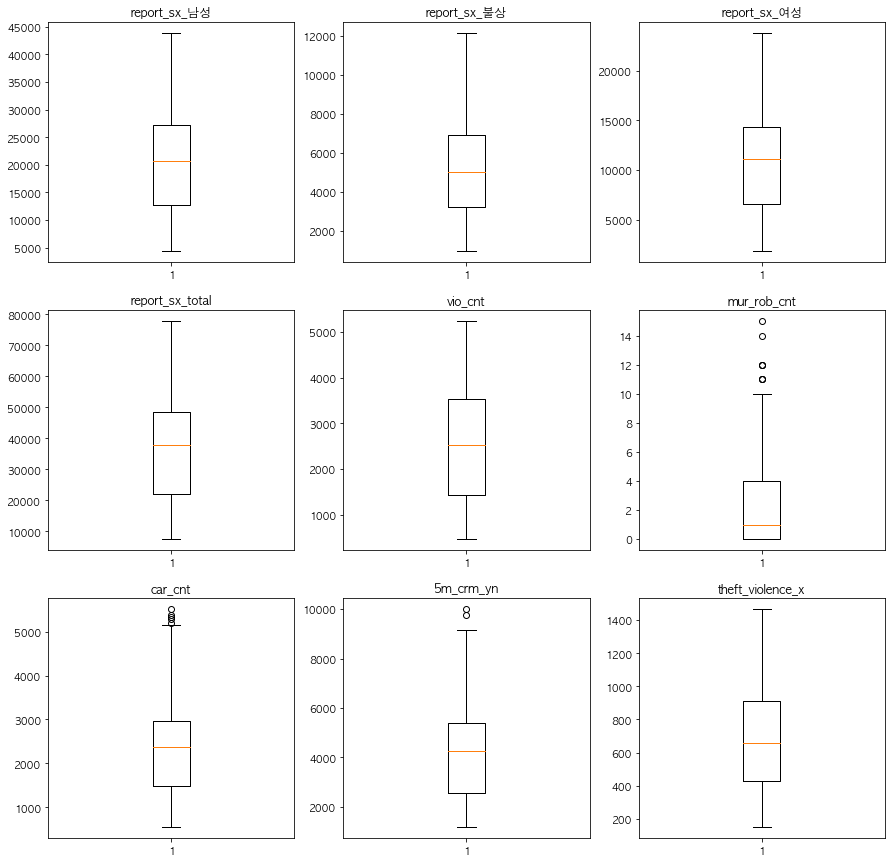

In [8]:
plt.figure(figsize=(15,15))

# 1번 - 9번 feature
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.boxplot(df[col_name[i-1]])
    plt.title(col_name[i-1])
plt.show()

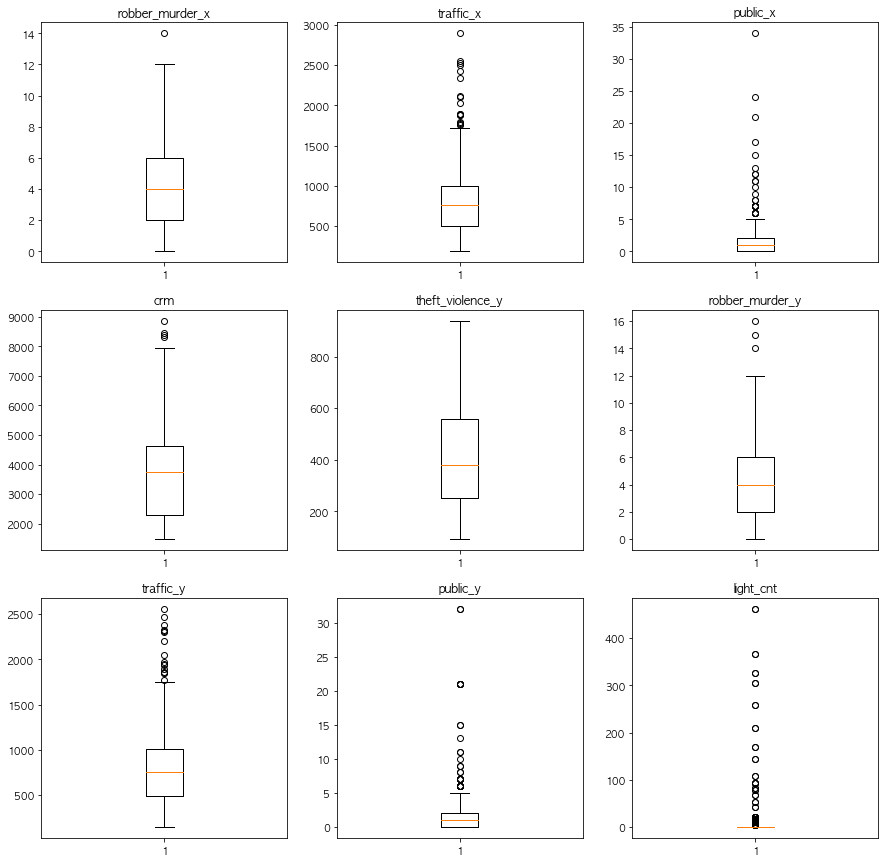

In [9]:
plt.figure(figsize=(15,15))

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.boxplot(df[col_name[i+8]])
    plt.title(col_name[i+8])
    
plt.show()

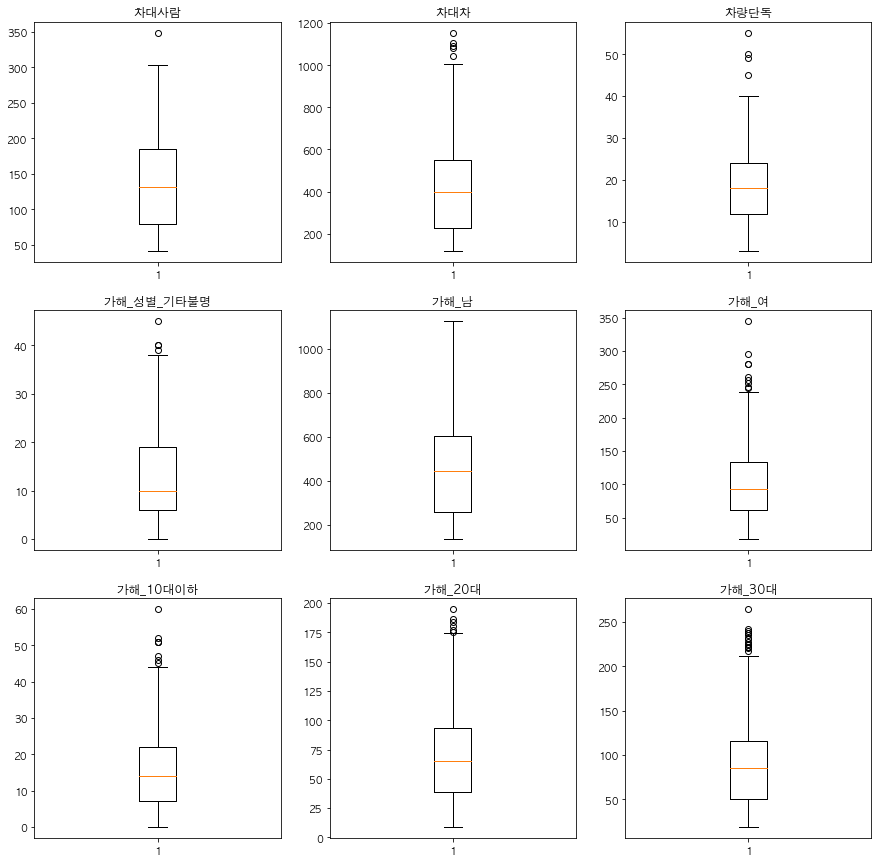

In [10]:
plt.figure(figsize=(15,15))

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.boxplot(df[col_name[i+17]])
    plt.title(col_name[i+17])
    
plt.show()

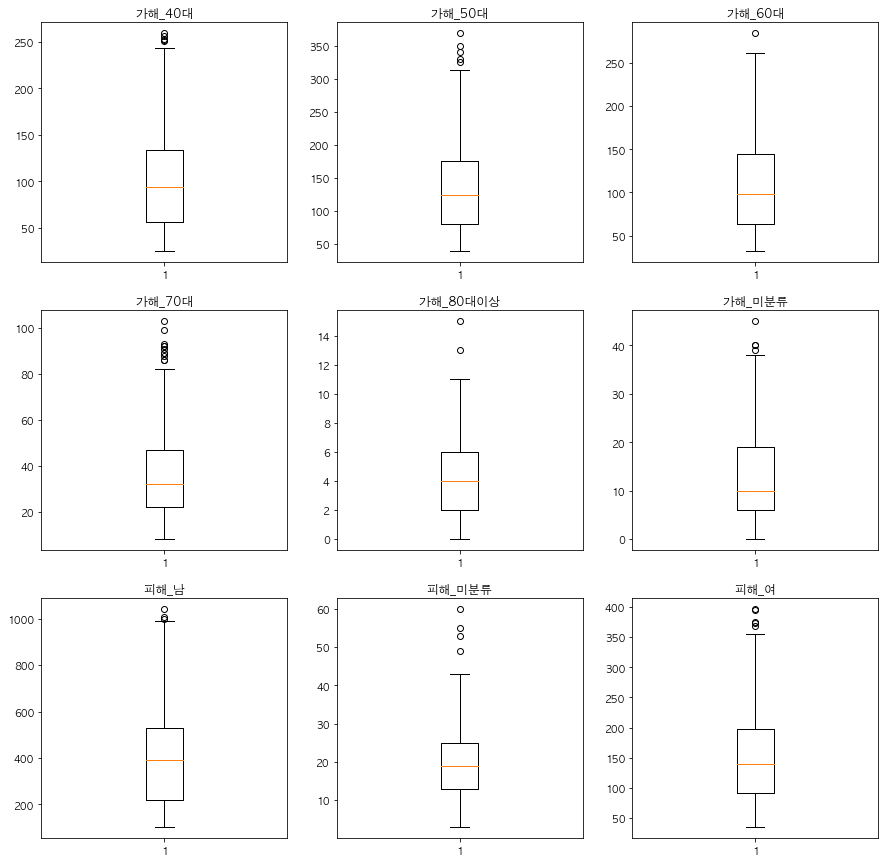

In [11]:
plt.figure(figsize=(15,15))

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.boxplot(df[col_name[i+26]])
    plt.title(col_name[i+26])
    
plt.show()

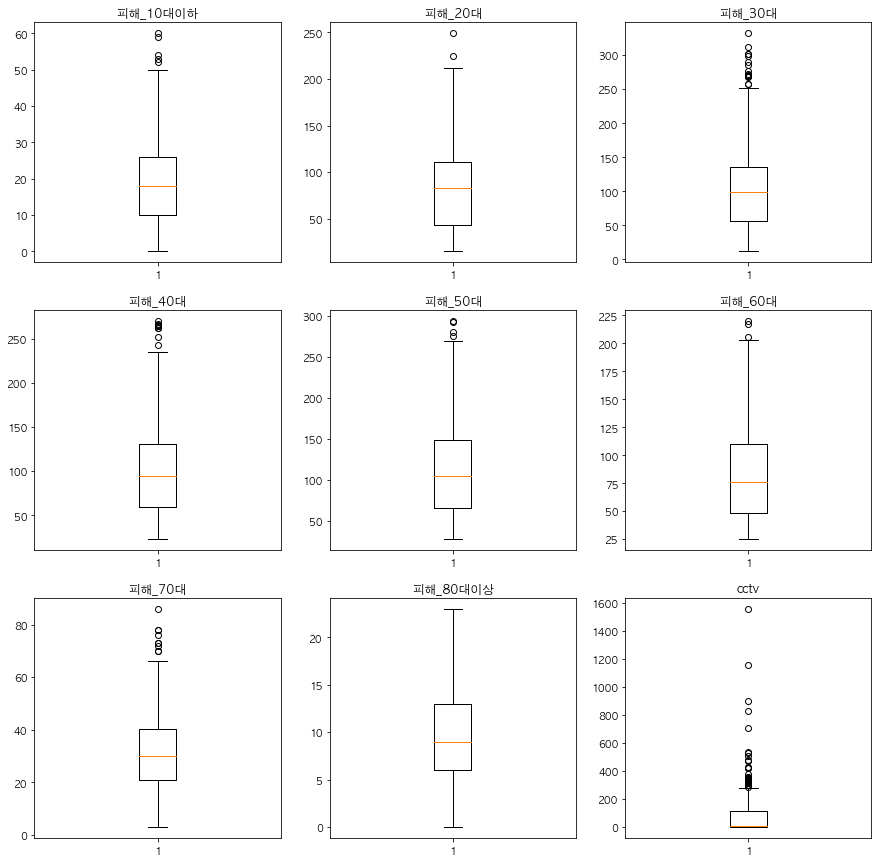

In [12]:
plt.figure(figsize=(15,15))

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.boxplot(df[col_name[i+35]])
    plt.title(col_name[i+35])
    
plt.show()

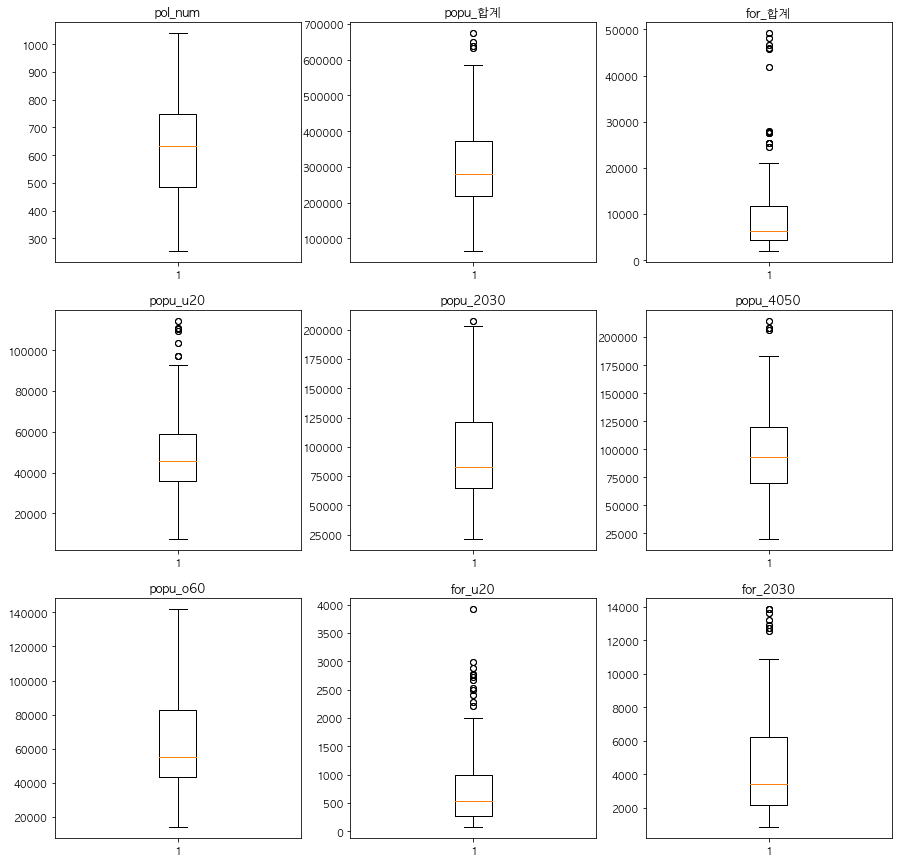

In [13]:
plt.figure(figsize=(15,15))

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.boxplot(df[col_name[i+44]])
    plt.title(col_name[i+44])
    
plt.show()

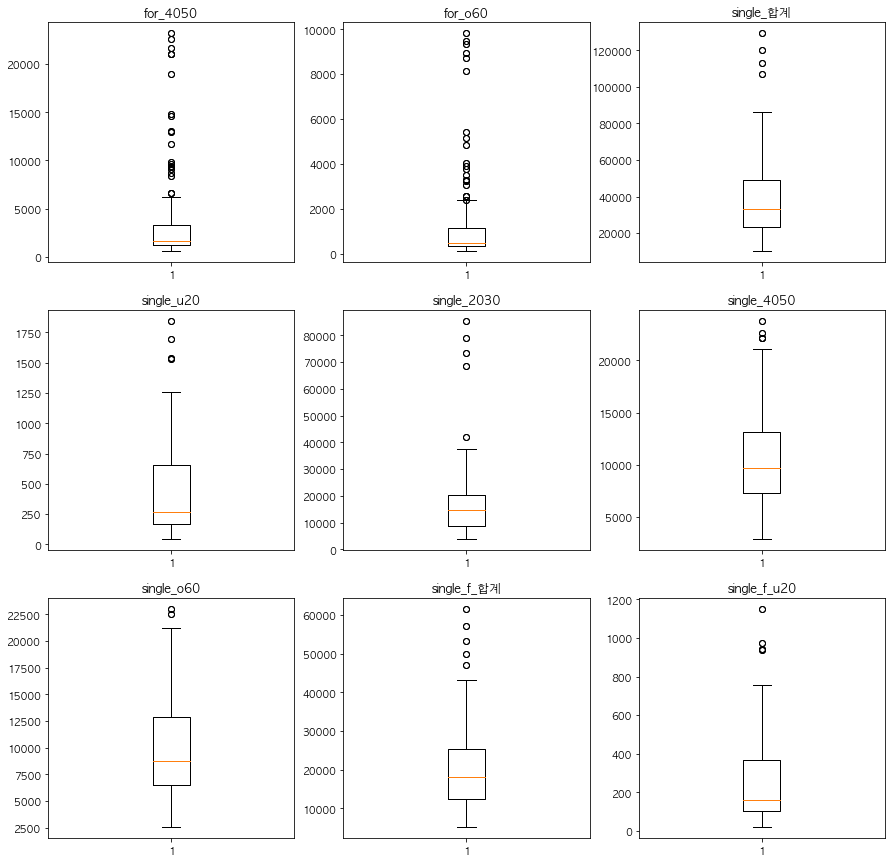

In [14]:
plt.figure(figsize=(15,15))

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.boxplot(df[col_name[i+53]])
    plt.title(col_name[i+53])
    
plt.show()

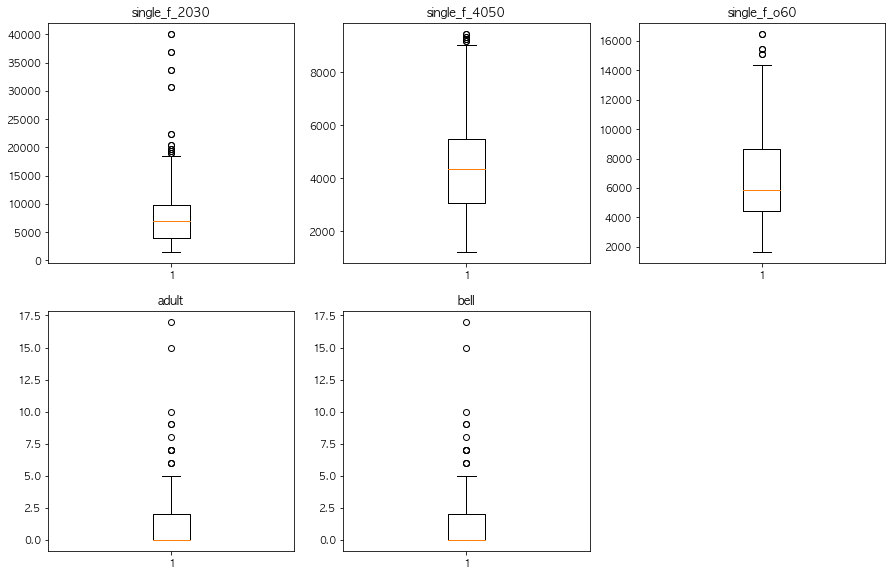

In [15]:
plt.figure(figsize=(15,15))

for i in range(1,6):
    plt.subplot(3,3,i)
    plt.boxplot(df[col_name[i+62]])
    plt.title(col_name[i+62])
    
plt.show()

# 모델링을 통한 Feature 선택

## 모든 변수 탐색
- standard scale / 17~18 train, 19 test / MAE, f1-score / feature-importance 확인

In [18]:
df_ols = df[(df['year']!='2020(상반기)')&(df['year']!='2020(하반기)')]
df_ols

,jur_stn,year,report_sx_남성,report_sx_불상,report_sx_여성,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,5m_crm_yn,theft_violence_x,robber_murder_x,traffic_x,public_x,crm,theft_violence_y,robber_murder_y,traffic_y,public_y,light_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,가해_10대이하,가해_20대,가해_30대,가해_40대,가해_50대,가해_60대,가해_70대,가해_80대이상,가해_미분류,피해_남,피해_미분류,피해_여,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상,cctv,pol_num,popu_합계,for_합계,popu_u20,popu_2030,popu_4050,popu_o60,for_u20,for_2030,for_4050,for_o60,single_합계,single_u20,single_2030,single_4050,single_o60,single_f_합계,single_f_u20,single_f_2030,single_f_4050,single_f_o60,adult,bell,q1,q2,q3,q4,q5
0,서울중부경찰서,2017(상반기),13404.0,3239.0,5931.0,22574.0,1324.0,0.0,1412.0,3275.0,572.0,4.0,347.0,0.0,2594.0,236.0,3.0,336.0,1.0,210.0,74.0,190.0,6.0,8.0,220.0,42.0,4.0,40.0,36.0,42.0,69.0,48.0,22.0,2.0,8.0,198.0,6.0,65.0,8.0,34.0,54.0,38.0,58.0,46.0,20.0,5.0,0.0,514.0,63948.0,5132.5,8387.0,21310.0,20143.0,14108.0,446.5,2436.0,1651.0,599.0,10082.0,249.5,4310.5,2954.5,2567.5,5169.0,175.0,2128.0,1230.5,1635.5,0.0,0.0,75.2,76.5,69.9,65.9,72.6
1,서울종로경찰서,2017(상반기),11579.0,2560.0,5534.0,19674.0,1102.0,0.0,867.0,2914.0,525.0,2.0,202.0,8.0,2151.0,208.0,4.0,224.0,32.0,0.0,72.0,174.0,9.0,5.0,211.0,39.0,3.0,24.0,42.0,40.0,55.0,62.0,23.0,1.0,5.0,178.0,10.0,67.0,3.0,32.0,53.0,47.0,55.0,35.0,16.0,6.0,9.0,641.0,78638.5,5489.5,11965.5,25221.5,24593.5,16858.0,558.0,3031.5,1439.0,461.0,11819.0,253.5,5483.5,3220.5,2861.5,6022.0,158.0,2703.0,1378.5,1782.5,2.0,2.0,81.6,82.4,69.1,62.7,72.2
2,서울남대문경찰서,2017(상반기),9093.0,1855.0,3551.0,14499.0,949.0,0.0,736.0,2506.0,413.0,0.0,248.0,7.0,1732.0,224.0,0.0,242.0,9.0,10.0,63.0,182.0,10.0,5.0,213.0,37.0,1.0,25.0,38.0,40.0,65.0,57.0,22.0,2.0,5.0,192.0,11.0,52.0,3.0,27.0,49.0,48.0,55.0,45.0,13.0,3.0,0.0,494.0,63948.0,5132.5,8387.0,21310.0,20143.0,14108.0,446.5,2436.0,1651.0,599.0,10082.0,249.5,4310.5,2954.5,2567.5,5169.0,175.0,2128.0,1230.5,1635.5,0.0,0.0,77.3,79.3,68.8,61.0,71.7
3,서울서대문경찰서,2017(상반기),18441.0,10029.0,10298.0,38769.0,1924.0,0.0,1788.0,4267.0,674.0,0.0,335.0,1.0,3497.0,380.0,1.0,357.0,0.0,0.0,127.0,329.0,20.0,9.0,390.0,78.0,18.0,60.0,62.0,72.0,124.0,94.0,34.0,4.0,9.0,339.0,21.0,116.0,17.0,76.0,73.0,83.0,95.0,73.0,28.0,10.0,0.0,659.0,321345.0,13152.0,49895.0,108132.0,97431.0,65887.0,1370.0,8272.0,2590.0,920.0,43418.0,797.0,23040.0,9687.0,9894.0,24527.0,545.0,12420.0,4496.0,7066.0,0.0,0.0,78.0,80.0,67.0,66.3,71.4
4,서울혜화경찰서,2017(상반기),10829.0,2989.0,5038.0,18857.0,1127.0,0.0,899.0,2864.0,427.0,4.0,542.0,0.0,2319.0,170.0,5.0,567.0,0.0,0.0,68.0,180.0,11.0,9.0,216.0,33.0,2.0,36.0,35.0,44.0,66.0,51.0,15.0,2.0,9.0,190.0,12.0,56.0,3.0,35.0,45.0,39.0,56.0,43.0,21.0,5.0,3.0,475.0,78638.5,5489.5,11965.5,25221.5,24593.5,16858.0,558.0,3031.5,1439.0,461.0,11819.0,253.5,5483.5,3220.5,2861.5,6022.0,158.0,2703.0,1378.5,1782.5,0.0,0.0,78.6,80.6,70.7,65.2,75.4
5,서울용산경찰서,2017(상반기),23362.0,5359.0,10729.0,39450.0,2933.0,0.0,2307.0,5155.0,828.0,5.0,801.0,1.0,4038.0,430.0,4.0,859.0,2.0,10.0,121.0,442.0,23.0,21.0,481.0,83.0,8.0,69.0,101.0,88.0,130.0,121.0,44.0,3.0,21.0,422.0,23.0,141.0,11.0,88.0,127.0,101.0,118.0,80.0,30.0,7.0,0.0,683.0,223898.0,16005.0,32801.0,72465.0,71826.0,46806.0,2208.0,7403.0,5068.0,1326.0,33076.0,265.0,15395.0,9616.0,7800.0,17900.0,196.0,8210.0,4260.0,5234.0,0.0,0.0,77.8,78.1,68.9,69.9,71.6
6,서울성북경찰서,2017(상반기),12403.0,3431.0,6682.0,22517.0,1376.0,0.0,1276.0,2593.0,395.0,3.0,325.0,0.0,2210.0,194.0,6.0,317.0,0.0,0.0,108.0,255.0,13.0,5.0,311.0,61.0,9.0,45.0,55.0,70.0,82.0,76.0,31.0,3.0,5.0,267.0,13.0,97.0,14.0,58.0,64.0,68.0,70.0,56.0,24.0,9.0,0.0,536.0,222708.5,6595.5,38205.0,69398.5,69659.5,45445.5,752.0,4239.0,1269.5,335.0,27121.5,757.0,13390.5,6427.5,6546.5,14841.5,488.5,6867.0,2853.0,4633.0,0.0,0.0,77.9,79.4,69.3,67.0,73.4
7,서울동대문경찰서,2017(상반기),26568.0,5888.0,12694.0,45150.0,2968.0,0.0,2264.0,5552.0,883.0,4.0,679.0,0.0,4858.0,595.0,6.0,715.0,1.0,0.0,182.0,486.0,18.0,8.0,578.0,100.0,22.0,83.0,106.0,110.0,146.0,146.0,58.0,8.0,8.0,510.0,20.0,156.0,25.0,87.0,120.0,110.0,

In [19]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [20]:
# sclaeing
X = df_ols[df_ols.columns[2:-5]]
y = df_ols[df_ols.columns[-5:]]
y1 = df_ols[['q1']]
y2 = df_ols[['q2']]
y3 = df_ols[['q3']]
y4 = df_ols[['q4']]
y5 = df_ols[['q5']]

standard = StandardScaler()
standard.fit(X)
X_stand = standard.transform(X)
X_scale = pd.DataFrame(X_stand,columns = X.columns)

In [21]:
# OLS를 위한 const생성
X_scale = sm.add_constant(X_scale, has_constant="add")

# train, test셋 구분
X_train = X_scale.loc[:163]
X_test = X_scale.loc[164:]

y1_train = y1.loc[:163]
y1_test = y1.loc[164:]

y2_train = y2.loc[:163]
y2_test = y2.loc[164:]

y3_train = y3.loc[:163]
y3_test = y3.loc[164:]

y4_train = y4.loc[:163]
y4_test = y4.loc[164:]

y5_train = y5.loc[:163]
y5_test = y5.loc[164:]

### Q1

In [22]:
print(np.shape(X_train),np.shape(X_test),np.shape(y1_train),np.shape(y1_test))

(164, 69) (82, 69) (164, 1) (82, 1)


In [278]:
# 모델 학습
y1_model = sm.OLS(y1_train, X_train)
fit_y1_model = y1_model.fit()
fit_y1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     q1   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     3.997
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           3.39e-10
Time:                        09:39:52   Log-Likelihood:                -330.87
No. Observations:                 164   AIC:                             789.7
Df Residuals:                     100   BIC:                             988.1
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               76.2602      0.450    169.312      0.000      75.367      77.154
report_sx_남성      4118.4760   4996.325      0.824      0.412   -5794.090     1.4e+04
report_sx_불상      1077.5295   1305.432      0.825      0.411   -1512.411    3667.470
report_sx_여성      2172.7710   2636.987      0.824      0.412   -3058.936    7404.478
report_sx_total  -7231.2638   8769.161     -0.825      0.412   -2.46e+04    1.02e+04
vio_cnt              0.1687      1.972      0.086      0.932      -3.744       4.081
mur_rob_cnt          0.0487      0.338      0.144      0.886      -0.622       0.720
car_cnt              0.0358      1.491      0.024      0.981      -2.922       2.994
5m_crm_yn            2.9369      3.006      0.977      0.331      -3.028       8.901
theft_violence_x    -0.2436      1.495     -0.163      0.871      -3.209       2.722
robber_murder_x      0.4579      0.420      1.091      0.278      -0.375       1.291
traffic_x            0.4726      2.019      0.234      0.815      -3.532       4.477
public_x            -0.1007      0.330     -0.305      0.761      -0.756       0.555
crm                 -4.0207      2.992     -1.344      0.182      -9.957       1.916
theft_violence_y     0.5169      0.941      0.549      0.584      -1.350       2.383
robber_murder_y     -0.0294      0.453     -0.065      0.948      -0.927       0.868
traffic_y            0.9763      2.085      0.468      0.641      -3.161       5.114
public_y             0.4073      0.315      1.291      0.200      -0.218       1.033
light_cnt            0.2925      0.330      0.885      0.378      -0.363       0.948
차대사람               -40.0390     39.606     -1.011      0.314    -118.615      38.537
차대차               -139.8496    140.478     -0.996      0.322    -418.553     138.854
차량단독                -4.3225      5.537     -0.781      0.437     -15.307       6.662
가해_성별_기타불명           8.5510      8.635      0.990      0.324      -8.581      25.683
가해_남                31.6482    129.966      0.244      0.808    -226.200     289.496
가해_여                10.6970     33.584      0.319      0.751     -55.932      77.326
가해_10대이하             1.2197      4.115      0.296      0.768      -6.945       9.385
가해_20대               6.2216     15.123      0.411      0.682     -23.782      36.225
가해_30대               9.2698     19.331      0.480      0.633     -29.082      47.622
가해_40대               8.9139     19.004      0.469      0.640     -28.790      46.618
가해_50대              10.3860     24.167      0.430      0.668     -37.561      58.333
가해_60대               9.5485     19.432      0.491      0.624     -29.004      48.101
가해_70대               3.7111      7.052      0.526      0.600     -10.280      17.702
가해_80대이상             0.2015      1.097      0.184      0.855      -1.976       2.379
가해_미분류              -5.

In [279]:
# 예측 및 결과
y1_pred = fit_y1_model.predict(X_test)
mean_absolute_error(y1_test, y1_pred)

3.265686528434842

- 모든 변수 사용
- MAE : 3.265

### Q1. feature 선택 1
- permutation_importance

In [280]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer

# MAPE
def mean_absolute_percentage_error(y1_test, y1_pred):
    y1_test, y1_pred = np.array(y1_test), np.array(y1_pred)
    return np.mean(np.abs((y1_test - y1_pred) / y1_test)) * 100

# fit_y1_model : 훈련된 모델
# X_train : 훈련데이터 Feature
# y1_train : 훈련데이터 Target
# scoring : Feature 를 Shuffler 한 뒤, 예측값과 실제값을 어떤 Metric 을 사용해 비교할지
# n_repeats : 특정 Feature 를 몇번 Shuffle 할 것인지
# random_state : 난수 고정
result = permutation_importance(fit_y1_model, X_test, y1_test, scoring =make_scorer(mean_absolute_percentage_error,greater_is_better=False),
                            n_repeats=3000)
# Feature label
Feature = X_test

# Feature 중요도를 오름차순으로 정렬한 뒤, 해당 Feature 의 index 를 저장
sorted_result = result.importances_mean.argsort()

# 결과를 DataFrame 화
importances = pd.DataFrame(result.importances_mean[sorted_result], index=Feature.columns[sorted_result]).sort_values(0, ascending=False)   
importances

,0
report_sx_total,10939.219278
report_sx_남성,6258.577692
report_sx_여성,3255.771179
report_sx_불상,1595.656066
차대차,194.368089
차대사람,54.016575
가해_남,40.455086
피해_30대,25.446934
피해_20대,21.839804
피해_50대,20.625919


In [281]:
# feature importance로 상위 30개 선정
new_col = importances.index[:30]
X_train_new = X_train[new_col]
X_test_new = X_test[new_col]

In [282]:
# 모델 학습
y1_model_new = sm.OLS(y1_train, X_train_new)
fit_y1_model_new = y1_model_new.fit()
# fit_y1_model_new.summary()

In [283]:
# 예측 및 결과
y1_pred_new = fit_y1_model_new.predict(X_test_new)
mean_absolute_error(y1_test, y1_pred_new)

127.76528074218886

- 변수 30개 선정 (new_col)
- MAE가 127로 오히려 안좋게 나옴

=> 이 방법은 OLS에서 하지 말자

### Q1. 전체데이터 OLS feature 선택2
- 단계적 선택법
- p-value : 0.3,0.1,0.05 3가지 선택

In [58]:
## 전진 단계별 선택법

variables = X_train.columns.tolist()
y = y1_train

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [303]:
p03_col = selected_variables

In [299]:
p01_col = selected_variables

In [59]:
p005_col = selected_variables

In [304]:
# 모델 학습
y03 = sm.OLS(y1_train, X_train[p03_col])
fit_y03 = y03.fit()
# fit_y03.summary()

In [305]:
# 예측 및 결과
y_03_pred = fit_y03.predict(X_test[p03_col])
mean_absolute_error(y1_test, y_03_pred)

2.395955447224343

In [300]:
# 모델 학습
y01 = sm.OLS(y1_train, X_train[p01_col])
fit_y01 = y01.fit()
# fit_y01.summary()

In [301]:
# 예측 및 결과
y_01_pred = fit_y01.predict(X_test[p01_col])
mean_absolute_error(y1_test, y_01_pred)

2.733516860796741

In [60]:
# 모델 학습
y005 = sm.OLS(y1_train, X_train[p005_col])
fit_y005 = y005.fit()
# fit_y005.summary()

In [61]:
# 예측 및 결과
y_005_pred = fit_y005.predict(X_test[p005_col])
mean_absolute_error(y1_test, y_005_pred)

2.445676828514455

- 전체 비교했을 때, 가장 좋은 점수가 나온 것
- 전체 컬럼 단계적 선택 p-value 0.3 이하인것
-'피해_30대', 'vio_cnt', 'pol_num', '피해_여', '가해_10대이하', 'popu_u20', 'single_4050', 'single_f_합계', '피해_70대',
 'for_2030', 'public_y', 'for_u20', '피해_80대이상', 'light_cnt', '피해_20대', '가해_20대', 'traffic_y', 'cctv',
 'robber_murder_x', '가해_50대', '가해_60대', 'single_u20'
- MAE : 2.395

### Q2. 전체데이터 OLS feature 선택2
- 단계적 선택법
- p-value : 0.3,0.1,0.05 3가지 선택

In [13]:
## 전진 단계별 선택법

variables = X_train.columns.tolist()
y = y2_train

selected_variables = [] ## 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [347]:
p03_col = selected_variables

In [14]:
p01_col = selected_variables

In [369]:
p005_col = selected_variables

In [372]:
# 모델 학습
y03 = sm.OLS(y2_train, X_train[p03_col])
fit_y03 = y03.fit()
# fit_y03.summary()

In [373]:
# 예측 및 결과
y_03_pred = fit_y03.predict(X_test[p03_col])
mean_absolute_error(y2_test, y_03_pred)

2.6301812692995736

In [374]:
# 모델 학습
y01 = sm.OLS(y2_train, X_train[p01_col])
fit_y01 = y01.fit()
# fit_y01.summary()

In [375]:
# 예측 및 결과
y_01_pred = fit_y01.predict(X_test[p01_col])
mean_absolute_error(y2_test, y_01_pred)

2.4056964250129242

In [376]:
# 모델 학습
y005 = sm.OLS(y2_train, X_train[p005_col])
fit_y005 = y005.fit()
# fit_y005.summary()

In [377]:
# 예측 및 결과
y_005_pred = fit_y005.predict(X_test[p005_col])
mean_absolute_error(y2_test, y_005_pred)

2.4056964250129242

- 전체 비교했을 때, 가장 좋은 점수가 나온 것
- 전체 컬럼 단계적 선택 p-value 0.05 이하인것
-'for_4050', '피해_30대', 'vio_cnt', 'popu_u20', '피해_70대', '피해_80대이상', 'light_cnt', 'public_y', 'for_u20', '차대차',
 '피해_여', 'mur_rob_cnt'
- MAE : 2.405

### Q3. 전체데이터 OLS feature 선택2
- 단계적 선택법
- p-value : 0.3,0.1,0.05 3가지 선택

In [23]:
## 전진 단계별 선택법

variables = X_train.columns.tolist()
y = y3_train

selected_variables = [] ## 선택된 변수들
sl_enter = 0.3
sl_remove = 0.3
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [24]:
p03_col = selected_variables

In [17]:
p01_col = selected_variables

In [21]:
p005_col = selected_variables

In [25]:
# 모델 학습
y03 = sm.OLS(y3_train, X_train[p03_col])
fit_y03 = y03.fit()
# fit_y03.summary()

In [26]:
# 예측 및 결과
y_03_pred = fit_y03.predict(X_test[p03_col])
mean_absolute_error(y3_test, y_03_pred)

2.524242062695334

In [24]:
# 모델 학습
y01 = sm.OLS(y3_train, X_train[p01_col])
fit_y01 = y01.fit()
# fit_y01.summary()

In [25]:
# 예측 및 결과
y_01_pred = fit_y01.predict(X_test[p01_col])
mean_absolute_error(y3_test, y_01_pred)

2.6292032356153543

In [26]:
# 모델 학습
y005 = sm.OLS(y3_train, X_train[p005_col])
fit_y005 = y005.fit()
# fit_y005.summary()

In [27]:
# 예측 및 결과
y_005_pred = fit_y005.predict(X_test[p005_col])
mean_absolute_error(y3_test, y_005_pred)

2.647344514541874

- 전체 비교했을 때, 가장 좋은 점수가 나온 것
- 전체 컬럼 단계적 선택 p-value 0.3 이하인것
-  'popu_o60', '가해_10대이하', '피해_70대', 'single_o60', '피해_10대이하', 'traffic_y', 'pol_num', '차대사람', '가해_여',
 '피해_20대', 'cctv', 'mur_rob_cnt', 'single_f_o60'
- MAE : 2.524242062695334

### Q4. 전체데이터 OLS feature 선택2
- 단계적 선택법
- p-value : 0.3,0.1,0.05 3가지 선택

In [33]:
## 전진 단계별 선택법

variables = X_train.columns.tolist()
y = y4_train

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [30]:
p03_col = selected_variables

In [32]:
p01_col = selected_variables

In [34]:
p005_col = selected_variables

In [35]:
# 모델 학습
y03 = sm.OLS(y4_train, X_train[p03_col])
fit_y03 = y03.fit()
# fit_y03.summary()

In [36]:
# 예측 및 결과
y_03_pred = fit_y03.predict(X_test[p03_col])
mean_absolute_error(y4_test, y_03_pred)

3.3251590016001766

In [37]:
# 모델 학습
y01 = sm.OLS(y4_train, X_train[p01_col])
fit_y01 = y01.fit()
# fit_y01.summary()

In [38]:
# 예측 및 결과
y_01_pred = fit_y01.predict(X_test[p01_col])
mean_absolute_error(y4_test, y_01_pred)

2.477003347714468

In [39]:
# 모델 학습
y005 = sm.OLS(y4_train, X_train[p005_col])
fit_y005 = y005.fit()
# fit_y005.summary()

In [40]:
# 예측 및 결과
y_005_pred = fit_y005.predict(X_test[p005_col])
mean_absolute_error(y4_test, y_005_pred)

2.477003347714468

- 전체 비교했을 때, 가장 좋은 점수가 나온 것
- 전체 컬럼 단계적 선택 p-value 0.05 이하인것
- 'for_합계', 'mur_rob_cnt', 'cctv', 'for_u20', 'theft_violence_y', 'car_cnt', '가해_20대', '피해_미분류', 'traffic_y',
 '5m_crm_yn', '가해_40대'
- MAE : 2.477003347714468

### Q5. 전체데이터 OLS feature 선택2
- 단계적 선택법
- p-value : 0.3,0.1,0.05 3가지 선택

In [47]:
## 전진 단계별 선택법

variables = X_train.columns.tolist()
y = y5_train

selected_variables = [] ## 선택된 변수들
sl_enter = 0.3
sl_remove = 0.3
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [48]:
p03_col = selected_variables

In [46]:
p01_col = selected_variables

In [44]:
p005_col = selected_variables

In [51]:
# 모델 학습
y03 = sm.OLS(y5_train, X_train[p03_col])
fit_y03 = y03.fit()
# fit_y03.summary()

In [52]:
# 예측 및 결과
y_03_pred = fit_y03.predict(X_test[p03_col])
mean_absolute_error(y5_test, y_03_pred)

2.377409591943425

In [53]:
# 모델 학습
y01 = sm.OLS(y5_train, X_train[p01_col])
fit_y01 = y01.fit()
# fit_y01.summary()

In [54]:
# 예측 및 결과
y_01_pred = fit_y01.predict(X_test[p01_col])
mean_absolute_error(y5_test, y_01_pred)

2.463816127308333

In [55]:
# 모델 학습
y005 = sm.OLS(y5_train, X_train[p005_col])
fit_y005 = y005.fit()
# fit_y005.summary()

In [56]:
# 예측 및 결과
y_005_pred = fit_y005.predict(X_test[p005_col])
mean_absolute_error(y5_test, y_005_pred)

2.467567683628487

- 전체 비교했을 때, 가장 좋은 점수가 나온 것
- 전체 컬럼 단계적 선택 p-value 0.3 이하인것
- 'vio_cnt', 'mur_rob_cnt', 'popu_u20', 'single_4050', '가해_20대', 'single_f_2030', '피해_70대', '가해_성별_기타불명',
 '피해_미분류', 'light_cnt', '피해_20대', 'cctv', 'popu_2030', 'traffic_y', 'for_2030', 'for_u20', 'car_cnt',
 'theft_violence_y', 'robber_murder_x', '피해_80대이상', '차대사람', '피해_40대', '가해_40대'
- MAE : 2.377409591943425

### XGB feature importance 상위 15개 Q1
- 15개 전체 OLS
- 15개 단계적 변수선택으로 OLS

In [310]:
xgb_top15 = ['for_4050', 'for_합계', 'for_u20', 'for_2030', 'single_2030',
       'single_f_o60', 'single_o60', 'single_f_합계', 'popu_2030', '가해_10대이하',
       'theft_violence_y', 'popu_o60', 'single_합계', 'robber_murder_y',
       'for_o60', 'report_sx_여성', '피해_80대이상', 'single_f_4050', 'vio_cnt',
       'robber_murder_x']

In [311]:
# 모델 학습
y_xgb15 = sm.OLS(y1_train, X_train[xgb_top15])
fit_y_xgb15 = y_xgb15.fit()
# fit_yy.summary()

In [312]:
# 예측 및 결과
y_xgb15_pred = fit_y_xgb15.predict(X_test[xgb_top15])
mean_absolute_error(y1_test, y_xgb15_pred)

114.80325136363926

In [313]:
## 전진 단계별 선택법

variables = X_train[xgb_top15].columns.tolist()
y = y1_train

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [314]:
xgb_top15_step = selected_variables

In [315]:
# 모델 학습
y_xgb15_step = sm.OLS(y1_train, X_train[xgb_top15_step])
fit_y1_xgb15_step = y_xgb15_step.fit()
# fit_y123.summary()

In [316]:
# 예측 및 결과
fit_y1_xgb15_step_pred = fit_y1_xgb15_step.predict(X_test[xgb_top15_step])
mean_absolute_error(y1_test, fit_y1_xgb15_step_pred)

81.73401162933065

### XGB feature importance 상위 15개 Q2
- 15개 전체 OLS
- 15개 단계적 변수선택으로 OLS

In [324]:
xgb_top152 = ['robber_murder_y', 'single_o60', '가해_10대이하', 'for_u20',
       'robber_murder_x', 'for_합계', '피해_80대이상', 'vio_cnt', 'single_합계',
       'single_f_합계', 'theft_violence_y', 'theft_violence_x', 'for_o60',
       'single_4050', 'single_f_4050', 'popu_o60', 'single_f_o60',
       'report_sx_여성', 'for_2030', 'for_4050']

In [325]:
# 모델 학습
y_xgb152 = sm.OLS(y2_train, X_train[xgb_top152])
fit_y_xgb152 = y_xgb152.fit()
# fit_y_xgb152.summary()

In [326]:
# 예측 및 결과
y_xgb152_pred = fit_y_xgb152.predict(X_test[xgb_top152])
mean_absolute_error(y2_test, y_xgb152_pred)

128.15969169199812

In [342]:
## 전진 단계별 선택법

variables = X_train[xgb_top152].columns.tolist()
y = y2_train

selected_variables = [] ## 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [343]:
xgb_top152_step = selected_variables

In [344]:
# 모델 학습
y_xgb152_step = sm.OLS(y2_train, X_train[xgb_top152_step])
fit_xgb152_step = y_xgb152_step.fit()
# fit_y2_xgb15_step.summary()

In [345]:
# 예측 및 결과
fit_xgb152_step_pred = fit_xgb152_step.predict(X_test[xgb_top152_step])
mean_absolute_error(y2_test, fit_xgb152_step_pred)

80.54698105686226

## 상관관계를 기준으로 각 Q별 변수 선택
- standard scale / 17~18 train, 19 test / MAE / feature-importance 확인

In [37]:
df_corr = df.corr()
# 신고데이터 정리
# 연관데이터 : 총 범죄 발생수, 범죄 발생건 수(절도, 폭력 만 해당), 총 범죄 검거건 수, 범죄 검거건 수(절도, 폭력 만 해당), 범죄 검거건 수(교통 만 해당), 교통사고, 경찰수, 인구수, 여성 싱글, 여성 싱글4050, 

In [47]:
target = df_corr[df.columns[-5:]]
target

,q1,q2,q3,q4,q5
report_sx_남성,-0.120294,-0.120203,0.001244,-0.014420,-0.101728
report_sx_불상,-0.086136,-0.100764,0.005731,-0.029495,-0.081914
report_sx_여성,-0.172464,-0.180158,-0.020989,-0.047211,-0.153269
report_sx_total,-0.133221,-0.137661,-0.004752,-0.026812,-0.116245
vio_cnt,-0.273450,-0.275363,-0.067422,-0.106719,-0.251814
mur_rob_cnt,-0.066298,-0.076175,0.109742,0.221653,0.017011
car_cnt,0.056525,0.043256,-0.004321,0.163600,0.087414
5m_crm_yn,-0.107635,-0.128184,-0.131935,-0.135836,-0.135286
theft_violence_x,-0.161434,-0.170231,-0.114845,-0.165461,-0.181305
robber_murder_x,-0.173866,-0.212126,-0.104521,-0.131613,-0.176926


In [98]:
q1_f = target[abs(target['q1']) > 0.15]['q1'].index[:-5]
q1_f

Index(['report_sx_여성', 'vio_cnt', 'theft_violence_x', 'robber_murder_x',
       'theft_violence_y', 'robber_murder_y', '가해_10대이하', '피해_80대이상', 'for_합계',
       'popu_2030', 'popu_o60', 'for_u20', 'for_2030', 'for_4050', 'for_o60',
       'single_합계', 'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_4050', 'single_f_o60'],
      dtype='object')

In [99]:
q2_f = target[abs(target['q2']) > 0.15]['q2'].index[:-5]
q2_f

Index(['report_sx_여성', 'vio_cnt', 'theft_violence_x', 'robber_murder_x',
       'theft_violence_y', 'robber_murder_y', '가해_10대이하', '피해_80대이상', 'for_합계',
       'popu_o60', 'for_u20', 'for_2030', 'for_4050', 'for_o60', 'single_합계',
       'single_4050', 'single_o60', 'single_f_합계', 'single_f_4050',
       'single_f_o60'],
      dtype='object')

In [100]:
q3_f = target[abs(target['q3']) > 0.1]['q3'].index[:-5]
q3_f

Index(['mur_rob_cnt', '5m_crm_yn', 'theft_violence_x', 'robber_murder_x',
       'traffic_x', 'theft_violence_y', 'robber_murder_y', '가해_70대',
       '가해_80대이상', '피해_70대', 'for_합계', 'for_2030', 'for_4050', 'for_o60',
       'single_합계', 'single_2030', 'single_4050', 'single_f_2030', 'adult',
       'bell'],
      dtype='object')

In [101]:
q4_f = target[abs(target['q4']) > 0.15]['q4'].index[:-5]
q4_f

Index(['mur_rob_cnt', 'car_cnt', 'theft_violence_x', '가해_여', 'cctv', 'for_합계',
       'for_2030', 'for_4050', 'for_o60', 'single_합계', 'single_4050'],
      dtype='object')

In [102]:
q5_f = target[abs(target['q5']) > 0.15]['q5'].index[:-5]
q5_f

Index(['report_sx_여성', 'vio_cnt', 'theft_violence_x', 'robber_murder_x',
       'theft_violence_y', 'robber_murder_y', '가해_여', '가해_10대이하', '피해_80대이상',
       'for_합계', 'popu_2030', 'popu_o60', 'for_u20', 'for_2030', 'for_4050',
       'for_o60', 'single_합계', 'single_2030', 'single_4050', 'single_o60',
       'single_f_합계', 'single_f_4050', 'single_f_o60'],
      dtype='object')

# Feature selection
- OLS
- Scaler : MinMax

## Q1

In [110]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [105]:
df_ols = df[(df['year']!='2020(상반기)')&(df['year']!='2020(하반기)')]
df_ols

,jur_stn,year,report_sx_남성,report_sx_불상,report_sx_여성,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,5m_crm_yn,theft_violence_x,robber_murder_x,traffic_x,public_x,crm,theft_violence_y,robber_murder_y,traffic_y,public_y,light_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,가해_10대이하,가해_20대,가해_30대,가해_40대,가해_50대,가해_60대,가해_70대,가해_80대이상,가해_미분류,피해_남,피해_미분류,피해_여,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상,cctv,pol_num,popu_합계,for_합계,popu_u20,popu_2030,popu_4050,popu_o60,for_u20,for_2030,for_4050,for_o60,single_합계,single_u20,single_2030,single_4050,single_o60,single_f_합계,single_f_u20,single_f_2030,single_f_4050,single_f_o60,adult,bell,q1,q2,q3,q4,q5
0,서울중부경찰서,2017(상반기),13404.0,3239.0,5931.0,22574.0,1324.0,0.0,1412.0,3275.0,572.0,4.0,347.0,0.0,2594.0,236.0,3.0,336.0,1.0,210.0,74.0,190.0,6.0,8.0,220.0,42.0,4.0,40.0,36.0,42.0,69.0,48.0,22.0,2.0,8.0,198.0,6.0,65.0,8.0,34.0,54.0,38.0,58.0,46.0,20.0,5.0,0.0,514.0,63948.0,5132.5,8387.0,21310.0,20143.0,14108.0,446.5,2436.0,1651.0,599.0,10082.0,249.5,4310.5,2954.5,2567.5,5169.0,175.0,2128.0,1230.5,1635.5,0.0,0.0,75.2,76.5,69.9,65.9,72.6
1,서울종로경찰서,2017(상반기),11579.0,2560.0,5534.0,19674.0,1102.0,0.0,867.0,2914.0,525.0,2.0,202.0,8.0,2151.0,208.0,4.0,224.0,32.0,0.0,72.0,174.0,9.0,5.0,211.0,39.0,3.0,24.0,42.0,40.0,55.0,62.0,23.0,1.0,5.0,178.0,10.0,67.0,3.0,32.0,53.0,47.0,55.0,35.0,16.0,6.0,9.0,641.0,78638.5,5489.5,11965.5,25221.5,24593.5,16858.0,558.0,3031.5,1439.0,461.0,11819.0,253.5,5483.5,3220.5,2861.5,6022.0,158.0,2703.0,1378.5,1782.5,2.0,2.0,81.6,82.4,69.1,62.7,72.2
2,서울남대문경찰서,2017(상반기),9093.0,1855.0,3551.0,14499.0,949.0,0.0,736.0,2506.0,413.0,0.0,248.0,7.0,1732.0,224.0,0.0,242.0,9.0,10.0,63.0,182.0,10.0,5.0,213.0,37.0,1.0,25.0,38.0,40.0,65.0,57.0,22.0,2.0,5.0,192.0,11.0,52.0,3.0,27.0,49.0,48.0,55.0,45.0,13.0,3.0,0.0,494.0,63948.0,5132.5,8387.0,21310.0,20143.0,14108.0,446.5,2436.0,1651.0,599.0,10082.0,249.5,4310.5,2954.5,2567.5,5169.0,175.0,2128.0,1230.5,1635.5,0.0,0.0,77.3,79.3,68.8,61.0,71.7
3,서울서대문경찰서,2017(상반기),18441.0,10029.0,10298.0,38769.0,1924.0,0.0,1788.0,4267.0,674.0,0.0,335.0,1.0,3497.0,380.0,1.0,357.0,0.0,0.0,127.0,329.0,20.0,9.0,390.0,78.0,18.0,60.0,62.0,72.0,124.0,94.0,34.0,4.0,9.0,339.0,21.0,116.0,17.0,76.0,73.0,83.0,95.0,73.0,28.0,10.0,0.0,659.0,321345.0,13152.0,49895.0,108132.0,97431.0,65887.0,1370.0,8272.0,2590.0,920.0,43418.0,797.0,23040.0,9687.0,9894.0,24527.0,545.0,12420.0,4496.0,7066.0,0.0,0.0,78.0,80.0,67.0,66.3,71.4
4,서울혜화경찰서,2017(상반기),10829.0,2989.0,5038.0,18857.0,1127.0,0.0,899.0,2864.0,427.0,4.0,542.0,0.0,2319.0,170.0,5.0,567.0,0.0,0.0,68.0,180.0,11.0,9.0,216.0,33.0,2.0,36.0,35.0,44.0,66.0,51.0,15.0,2.0,9.0,190.0,12.0,56.0,3.0,35.0,45.0,39.0,56.0,43.0,21.0,5.0,3.0,475.0,78638.5,5489.5,11965.5,25221.5,24593.5,16858.0,558.0,3031.5,1439.0,461.0,11819.0,253.5,5483.5,3220.5,2861.5,6022.0,158.0,2703.0,1378.5,1782.5,0.0,0.0,78.6,80.6,70.7,65.2,75.4
5,서울용산경찰서,2017(상반기),23362.0,5359.0,10729.0,39450.0,2933.0,0.0,2307.0,5155.0,828.0,5.0,801.0,1.0,4038.0,430.0,4.0,859.0,2.0,10.0,121.0,442.0,23.0,21.0,481.0,83.0,8.0,69.0,101.0,88.0,130.0,121.0,44.0,3.0,21.0,422.0,23.0,141.0,11.0,88.0,127.0,101.0,118.0,80.0,30.0,7.0,0.0,683.0,223898.0,16005.0,32801.0,72465.0,71826.0,46806.0,2208.0,7403.0,5068.0,1326.0,33076.0,265.0,15395.0,9616.0,7800.0,17900.0,196.0,8210.0,4260.0,5234.0,0.0,0.0,77.8,78.1,68.9,69.9,71.6
6,서울성북경찰서,2017(상반기),12403.0,3431.0,6682.0,22517.0,1376.0,0.0,1276.0,2593.0,395.0,3.0,325.0,0.0,2210.0,194.0,6.0,317.0,0.0,0.0,108.0,255.0,13.0,5.0,311.0,61.0,9.0,45.0,55.0,70.0,82.0,76.0,31.0,3.0,5.0,267.0,13.0,97.0,14.0,58.0,64.0,68.0,70.0,56.0,24.0,9.0,0.0,536.0,222708.5,6595.5,38205.0,69398.5,69659.5,45445.5,752.0,4239.0,1269.5,335.0,27121.5,757.0,13390.5,6427.5,6546.5,14841.5,488.5,6867.0,2853.0,4633.0,0.0,0.0,77.9,79.4,69.3,67.0,73.4
7,서울동대문경찰서,2017(상반기),26568.0,5888.0,12694.0,45150.0,2968.0,0.0,2264.0,5552.0,883.0,4.0,679.0,0.0,4858.0,595.0,6.0,715.0,1.0,0.0,182.0,486.0,18.0,8.0,578.0,100.0,22.0,83.0,106.0,110.0,146.0,146.0,58.0,8.0,8.0,510.0,20.0,156.0,25.0,87.0,120.0,110.0,

In [150]:
from sklearn.preprocessing import StandardScaler

In [155]:
X = df_ols[q1_f]
y = df_ols[['q1']]

standard = StandardScaler()
standard.fit(X)
X_stand = standard.transform(X)
X_scale = pd.DataFrame(X_stand,columns = X.columns)
X_scale = sm.add_constant(X_scale, has_constant="add")

# split 해줘야함

In [156]:
q1_model = sm.OLS(y, X_scale)
fit_q1_model = q1_model.fit()
fit_q1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     q1   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     12.54
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.93e-27
Time:                        17:21:59   Log-Likelihood:                -566.00
No. Observations:                 246   AIC:                             1176.
Df Residuals:                     224   BIC:                             1253.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               77.0972      0.161    477.713      0.000      76.779      77.415
report_sx_여성         3.0112      0.954      3.157      0.002       1.132       4.891
vio_cnt             -3.6066      0.887     -4.068      0.000      -5.354      -1.860
theft_violence_x     0.5737      0.493      1.163      0.246      -0.398       1.546
robber_murder_x      0.3622      0.314      1.154      0.250      -0.256       0.981
theft_violence_y    -0.1298      0.460     -0.282      0.778      -1.036       0.777
robber_murder_y     -0.1990      0.322     -0.618      0.537      -0.833       0.435
가해_10대이하            -0.5707      0.389     -1.466      0.144      -1.338       0.197
피해_80대이상            -0.0728      0.294     -0.248      0.805      -0.652       0.507
for_합계               0.2568      0.630      0.408      0.684      -0.984       1.497
popu_2030           -2.9315      1.409     -2.081      0.039      -5.708      -0.155
popu_o60             5.9836      1.521      3.935      0.000       2.987       8.980
for_u20              1.7401      0.551      3.157      0.002       0.654       2.826
for_2030            -1.5387      0.821     -1.873      0.062      -3.157       0.080
for_4050             3.1399      3.015      1.041      0.299      -2.802       9.082
for_o60             -4.1418      3.129     -1.324      0.187     -10.307       2.024
single_합계           26.3008     19.356      1.359      0.176     -11.841      64.443
single_2030         -4.2827     12.541     -0.341      0.733     -28.997      20.431
single_4050        -18.8609      5.405     -3.489      0.001     -29.512      -8.209
single_o60          -2.9735      5.643     -0.527      0.599     -14.093       8.146
single_f_합계        -17.1877      4.691     -3.664      0.000     -26.432      -7.944
single_f_4050       14.6947      3.409      4.311      0.000       7.978      21.412
single_f_o60        -1.0593      3.388     -0.313      0.755      -7.736       5.617
==============================================================================
Omnibus:                        2.300   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                2.105
Skew:                          -0.104   Prob(JB):                        0.349
Kurtosis:                       3.402   Cond. No.                     1.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [139]:
X = df_ols[q1_f]
y = df_ols[['q1']]

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_minmax = minMaxScaler.transform(X)
X_scale = pd.DataFrame(X_minmax,columns = X.columns)
X_scale = sm.add_constant(X_scale, has_constant="add")

In [140]:
q1_model = sm.OLS(y, X_scale)
fit_q1_model = q1_model.fit()
fit_q1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     q1   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     12.54
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.93e-27
Time:                        16:59:46   Log-Likelihood:                -566.00
No. Observations:                 246   AIC:                             1176.
Df Residuals:                     224   BIC:                             1253.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               77.2871      0.888     87.026      0.000      75.537      79.037
report_sx_여성        13.7242      4.347      3.157      0.002       5.158      22.290
vio_cnt            -14.0466      3.453     -4.068      0.000     -20.851      -7.242
theft_violence_x     2.3085      1.984      1.163      0.246      -1.602       6.219
robber_murder_x      1.8229      1.580      1.154      0.250      -1.291       4.936
theft_violence_y    -0.5956      2.110     -0.282      0.778      -4.754       3.563
robber_murder_y     -1.0589      1.712     -0.618      0.537      -4.433       2.316
가해_10대이하            -2.7377      1.868     -1.466      0.144      -6.419       0.943
피해_80대이상            -0.3360      1.357     -0.248      0.805      -3.011       2.339
for_합계               1.4516      3.138      0.463      0.644      -4.731       7.635
popu_2030          -12.0900      5.811     -2.081      0.039     -23.540      -0.640
popu_o60            24.9484      6.340      3.935      0.000      12.454      37.442
for_u20              9.2202      2.923      3.154      0.002       3.460      14.981
for_2030            -5.9215      3.229     -1.834      0.068     -12.285       0.442
for_4050            14.7321     14.131      1.043      0.298     -13.115      42.579
for_o60            -19.7981     14.969     -1.323      0.187     -49.295       9.699
single_합계          148.3455    109.172      1.359      0.176     -66.790     363.481
single_2030        -25.7584     75.429     -0.341      0.733    -174.400     122.884
single_4050        -83.2020     23.844     -3.489      0.001    -130.189     -36.215
single_o60         -12.5572     23.829     -0.527      0.599     -59.516      34.401
single_f_합계        -90.2348     24.627     -3.664      0.000    -138.765     -41.704
single_f_4050       62.8329     14.575      4.311      0.000      34.112      91.554
single_f_o60        -4.7646     15.240     -0.313      0.755     -34.796      25.267
==============================================================================
Omnibus:                        2.300   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                2.105
Skew:                          -0.104   Prob(JB):                        0.349
Kurtosis:                       3.402   Cond. No.                     1.78e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Q2

In [141]:
X = df_ols[q2_f]
y = df_ols[['q2']]

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_minmax = minMaxScaler.transform(X)
X_scale = pd.DataFrame(X_minmax,columns = X.columns)
X_scale = sm.add_constant(X_scale, has_constant="add")

In [142]:
q2_model = sm.OLS(y, X_scale)
fit_q2_model = q2_model.fit()
fit_q2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     q2   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     12.54
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           5.79e-26
Time:                        17:02:51   Log-Likelihood:                -566.97
No. Observations:                 246   AIC:                             1174.
Df Residuals:                     226   BIC:                             1244.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               79.2465      0.521    152.069      0.000      78.220      80.273
report_sx_여성        13.5551      4.216      3.215      0.001       5.247      21.863
vio_cnt            -13.6591      3.400     -4.018      0.000     -20.358      -6.960
theft_violence_x     2.6451      1.917      1.380      0.169      -1.132       6.422
robber_murder_x      0.4854      1.577      0.308      0.758      -2.621       3.592
theft_violence_y    -1.8702      2.077     -0.900      0.369      -5.964       2.223
robber_murder_y     -0.8242      1.702     -0.484      0.629      -4.179       2.530
가해_10대이하            -3.9624      1.803     -2.197      0.029      -7.516      -0.409
피해_80대이상             0.4811      1.345      0.358      0.721      -2.169       3.131
for_합계               5.6043      3.025      1.853      0.065      -0.357      11.565
popu_o60            21.1469      4.375      4.834      0.000      12.527      29.767
for_u20              7.2484      2.881      2.516      0.013       1.571      12.926
for_2030            -7.2012      2.590     -2.780      0.006     -12.305      -2.098
for_4050            33.1460     13.555      2.445      0.015       6.436      59.856
for_o60            -39.9914     14.660     -2.728      0.007     -68.879     -11.103
single_합계           77.6504     20.397      3.807      0.000      37.457     117.844
single_4050        -64.1142     14.308     -4.481      0.000     -92.309     -35.920
single_o60           7.9835     14.895      0.536      0.593     -21.368      37.335
single_f_합계        -62.6400     19.028     -3.292      0.001    -100.136     -25.144
single_f_4050       43.7878     12.034      3.639      0.000      20.075      67.501
single_f_o60       -16.9359     14.748     -1.148      0.252     -45.997      12.125
==============================================================================
Omnibus:                        0.969   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.838
Skew:                          -0.142   Prob(JB):                        0.658
Kurtosis:                       3.029   Cond. No.                     1.68e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Q3

In [143]:
X = df_ols[q3_f]
y = df_ols[['q3']]

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_minmax = minMaxScaler.transform(X)
X_scale = pd.DataFrame(X_minmax,columns = X.columns)
X_scale = sm.add_constant(X_scale, has_constant="add")

In [144]:
q3_model = sm.OLS(y, X_scale)
fit_q3_model = q3_model.fit()
fit_q3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     q3   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4.050
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.55e-07
Time:                        17:02:53   Log-Likelihood:                -553.56
No. Observations:                 246   AIC:                             1147.
Df Residuals:                     226   BIC:                             1217.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               69.5557      0.455    152.871      0.000      68.659      70.452
mur_rob_cnt          1.7933      0.956      1.877      0.062      -0.090       3.677
5m_crm_yn           -3.9880      3.061     -1.303      0.194     -10.019       2.043
theft_violence_x     0.6703      2.827      0.237      0.813      -4.901       6.242
robber_murder_x      0.3440      1.504      0.229      0.819      -2.620       3.308
traffic_x           -2.5616      1.968     -1.301      0.194      -6.440       1.317
theft_violence_y     2.7570      1.901      1.450      0.148      -0.990       6.504
robber_murder_y     -0.5071      1.605     -0.316      0.752      -3.671       2.656
가해_70대               1.1185      1.917      0.584      0.560      -2.658       4.895
가해_80대이상             0.2019      1.240      0.163      0.871      -2.242       2.646
피해_70대               5.8637      2.056      2.851      0.005       1.812       9.916
for_합계              60.0939     28.292      2.124      0.035       4.344     115.843
for_2030           -21.1697      9.005     -2.351      0.020     -38.914      -3.426
for_4050           -22.0941     21.082     -1.048      0.296     -63.637      19.449
for_o60            -20.6490     10.988     -1.879      0.061     -42.301       1.003
single_합계           -3.9080     10.170     -0.384      0.701     -23.947      16.131
single_2030        -10.7596     11.135     -0.966      0.335     -32.701      11.182
single_4050         -3.2048      4.084     -0.785      0.433     -11.252       4.843
single_f_2030       15.0974      8.132      1.857      0.065      -0.927      31.122
adult               -0.5657      0.664     -0.852      0.395      -1.874       0.743
bell                -0.5657      0.664     -0.852      0.395      -1.874       0.743
==============================================================================
Omnibus:                        2.106   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.787
Skew:                           0.142   Prob(JB):                        0.409
Kurtosis:                       3.306   Cond. No.                     9.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.5e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Q4

In [145]:
X = df_ols[q4_f]
y = df_ols[['q4']]

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_minmax = minMaxScaler.transform(X)
X_scale = pd.DataFrame(X_minmax,columns = X.columns)
X_scale = sm.add_constant(X_scale, has_constant="add")

In [146]:
q4_model = sm.OLS(y, X_scale)
fit_q4_model = q4_model.fit()
fit_q4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     q4   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     16.87
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.47e-24
Time:                        17:02:55   Log-Likelihood:                -627.65
No. Observations:                 246   AIC:                             1279.
Df Residuals:                     234   BIC:                             1321.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               69.6018      0.575    121.108      0.000      68.470      70.734
mur_rob_cnt          4.5302      1.105      4.099      0.000       2.353       6.708
car_cnt              9.3263      2.449      3.808      0.000       4.501      14.151
theft_violence_x   -11.7205      1.796     -6.527      0.000     -15.258      -8.183
가해_여                 7.4118      2.244      3.303      0.001       2.991      11.832
cctv                 4.6907      1.571      2.986      0.003       1.596       7.785
for_합계              95.4235     33.672      2.834      0.005      29.084     161.763
for_2030           -29.0504     10.909     -2.663      0.008     -50.543      -7.557
for_4050           -60.4848     23.462     -2.578      0.011    -106.709     -14.261
for_o60             -9.8921     13.228     -0.748      0.455     -35.954      16.170
single_합계            6.8632      3.955      1.735      0.084      -0.929      14.656
single_4050         -7.8212      2.765     -2.829      0.005     -13.269      -2.373
==============================================================================
Omnibus:                        1.486   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.476   Jarque-Bera (JB):                1.420
Skew:                          -0.085   Prob(JB):                        0.492
Kurtosis:                       2.668   Cond. No.                         275.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q5

In [147]:
X = df_ols[q5_f]
y = df_ols[['q5']]

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_minmax = minMaxScaler.transform(X)
X_scale = pd.DataFrame(X_minmax,columns = X.columns)
X_scale = sm.add_constant(X_scale, has_constant="add")

In [148]:
q5_model = sm.OLS(y, X_scale)
fit_q5_model = q5_model.fit()
fit_q5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     q5   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     11.96
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           5.74e-27
Time:                        17:02:57   Log-Likelihood:                -527.35
No. Observations:                 246   AIC:                             1101.
Df Residuals:                     223   BIC:                             1181.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               73.1427      0.761     96.152      0.000      71.644      74.642
report_sx_여성         4.4328      4.443      0.998      0.319      -4.322      13.188
vio_cnt             -6.9870      3.172     -2.203      0.029     -13.238      -0.736
theft_violence_x    -0.5699      1.700     -0.335      0.738      -3.920       2.780
robber_murder_x      1.1236      1.357      0.828      0.409      -1.551       3.798
theft_violence_y    -1.1680      1.814     -0.644      0.520      -4.743       2.407
robber_murder_y     -0.4044      1.470     -0.275      0.784      -3.302       2.493
가해_여                 8.6439      1.912      4.522      0.000       4.877      12.411
가해_10대이하            -4.1438      1.642     -2.524      0.012      -7.379      -0.909
피해_80대이상            -0.4535      1.186     -0.382      0.703      -2.790       1.883
for_합계               1.0751      2.839      0.379      0.705      -4.519       6.669
popu_2030           -6.3732      4.981     -1.280      0.202     -16.188       3.442
popu_o60            17.3702      5.505      3.156      0.002       6.522      28.218
for_u20              5.1267      2.505      2.046      0.042       0.190      10.063
for_2030            -1.0467      2.901     -0.361      0.719      -6.763       4.669
for_4050             9.2968     12.838      0.724      0.470     -16.002      34.595
for_o60            -13.9227     13.540     -1.028      0.305     -40.605      12.759
single_합계           -6.9893     95.065     -0.074      0.941    -194.330     180.352
single_2030         44.1567     64.974      0.680      0.497     -83.885     172.199
single_4050        -39.5314     21.258     -1.860      0.064     -81.423       2.360
single_o60          17.0891     20.566      0.831      0.407     -23.439      57.617
single_f_합계        -43.4518     22.081     -1.968      0.050     -86.967       0.063
single_f_4050       37.6412     12.906      2.917      0.004      12.209      63.074
single_f_o60       -12.7932     13.058     -0.980      0.328     -38.526      12.939
==============================================================================
Omnibus:                        1.259   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                0.956
Skew:                          -0.117   Prob(JB):                        0.620
Kurtosis:                       3.195   Cond. No.                     1.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### XGB 상관관계보고 돌린것

In [172]:
xgb_col=['for_o60', 'for_u20', 'single_o60', 'single_2030', 'for_합계', 'for_2030',
       'robber_murder_x', 'for_4050', '가해_10대이하', '피해_80대이상',
       'robber_murder_y', 'single_f_합계', 'popu_2030', 'popu_o60',
       'single_f_4050', 'theft_violence_y', 'single_f_o60', 'single_4050',
       'report_sx_여성', 'theft_violence_x']

In [173]:
# 모델 학습
y_xgb = sm.OLS(y1_train, X_train[xgb_col])
fit_y_xgb = y_xgb.fit()
# fit_y_xgb.summary()

In [174]:
# 예측 및 결과
y_xgb_pred = fit_y_xgb.predict(X_test[xgb_col])
mean_absolute_error(y1_test, y_xgb_pred)

124.93448971807297

In [175]:
## 전진 단계별 선택법

variables = X_train[xgb_col].columns.tolist()
y = y1_train

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [176]:
xcol= selected_variables

In [177]:
# 모델 학습
y_xgb2 = sm.OLS(y1_train, X_train[xcol])
fit_y_xgb2 = y_xgb2.fit()
# fit_y_xgb.summary()

In [178]:
# 예측 및 결과
y_xgb2_pred = fit_y_xgb2.predict(X_test[xcol])
mean_absolute_error(y1_test, y_xgb2_pred)

81.73401162933065